In [1]:
import matplotlib.pyplot as plt
plt.close('all')
%matplotlib inline

import pandas as pd
import numpy as np

import src.randgg
from src.randgg.algorithm import compute_closest_intersections,compute_regressions,print_best_p,compute_best_p
from src.randgg.plot import plot_curve, plot_regressions

In [2]:
nb_samples = 10000

In [3]:
df = pd.read_csv("connected_directed_%d.csv" % (nb_samples),sep=',')
df['p'] = df['p'].apply(lambda x : float(x.replace(',','.')) if type(x) is str else x).values
df.head()

,p,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
0,0.001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 432x288 with 0 Axes>

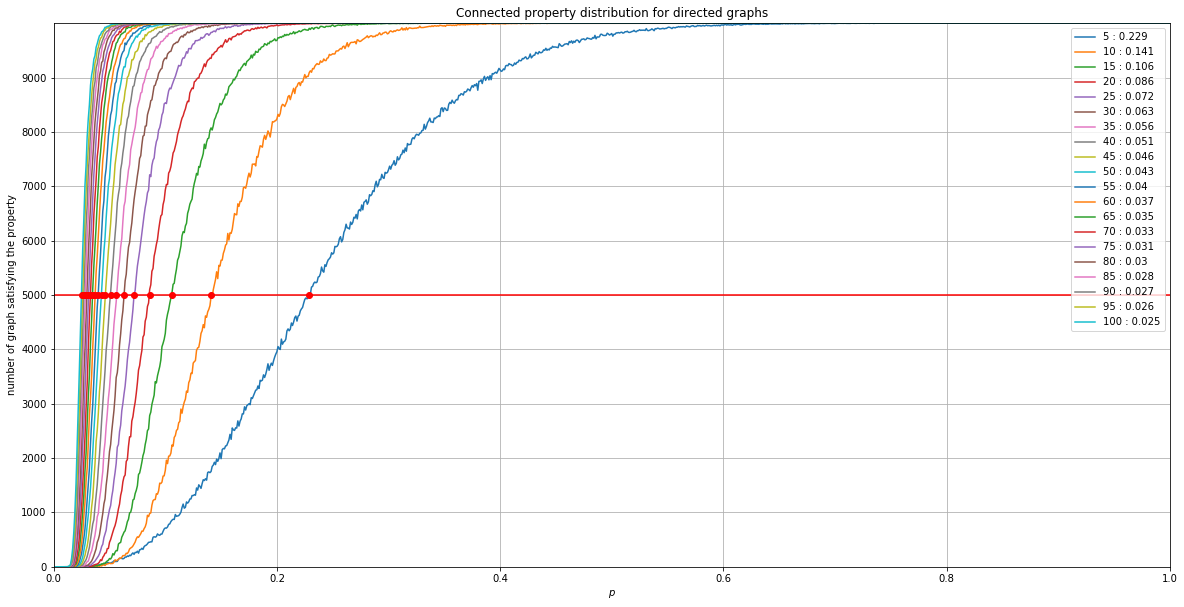

In [4]:
plot_curve(df,nb_samples,'Connected property distribution for directed graphs')

<Figure size 432x288 with 0 Axes>

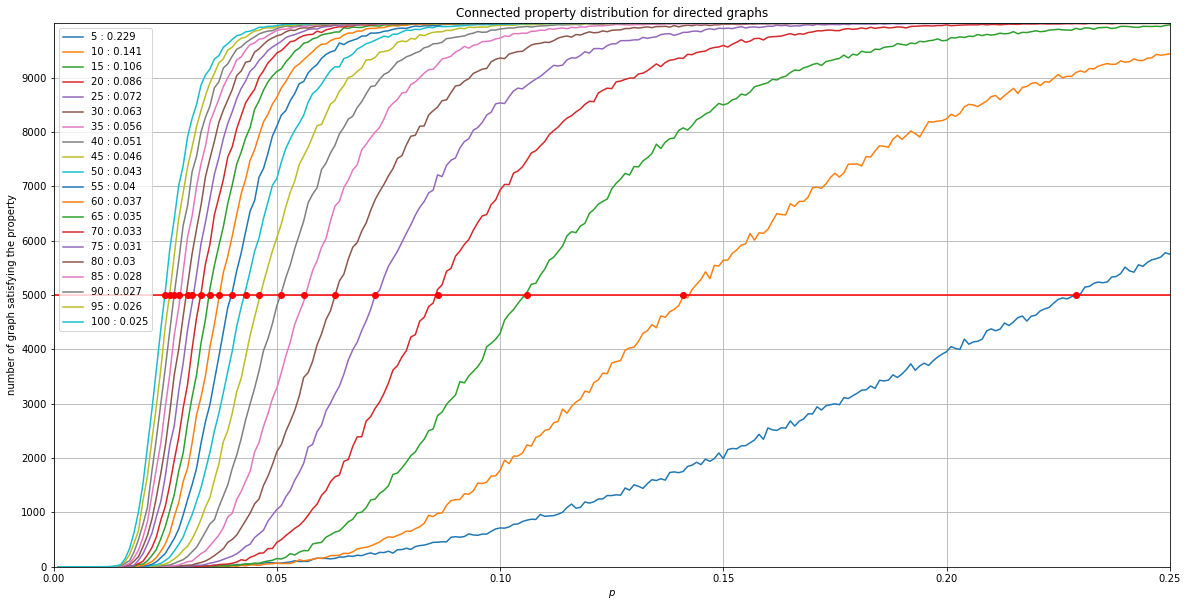

In [5]:
plot_curve(df,nb_samples,'Connected property distribution for directed graphs',xlim=(0.0,0.25))

In [6]:
print_best_p(df,nb_samples,max_degree=16)

Best p for 5 vertices : 0.228272, regression error : 24.029662
Best p for 10 vertices : 0.142109, regression error : 23.177524
Best p for 15 vertices : 0.106244, regression error : 55.139514
Best p for 20 vertices : 0.085885, regression error : 67.721680
Best p for 25 vertices : 0.073344, regression error : 92.415076
Best p for 30 vertices : 0.064281, regression error : 136.923053
Best p for 35 vertices : 0.057091, regression error : 173.694453
Best p for 40 vertices : 0.051059, regression error : 193.662473
Best p for 45 vertices : 0.046243, regression error : 200.605264
Best p for 50 vertices : 0.042445, regression error : 200.455437
Best p for 55 vertices : 0.039480, regression error : 199.623622
Best p for 60 vertices : 0.037033, regression error : 197.621639
Best p for 65 vertices : 0.034968, regression error : 202.852473
Best p for 70 vertices : 0.033195, regression error : 211.159015
Best p for 75 vertices : 0.031599, regression error : 220.439026
Best p for 80 vertices : 0.0301

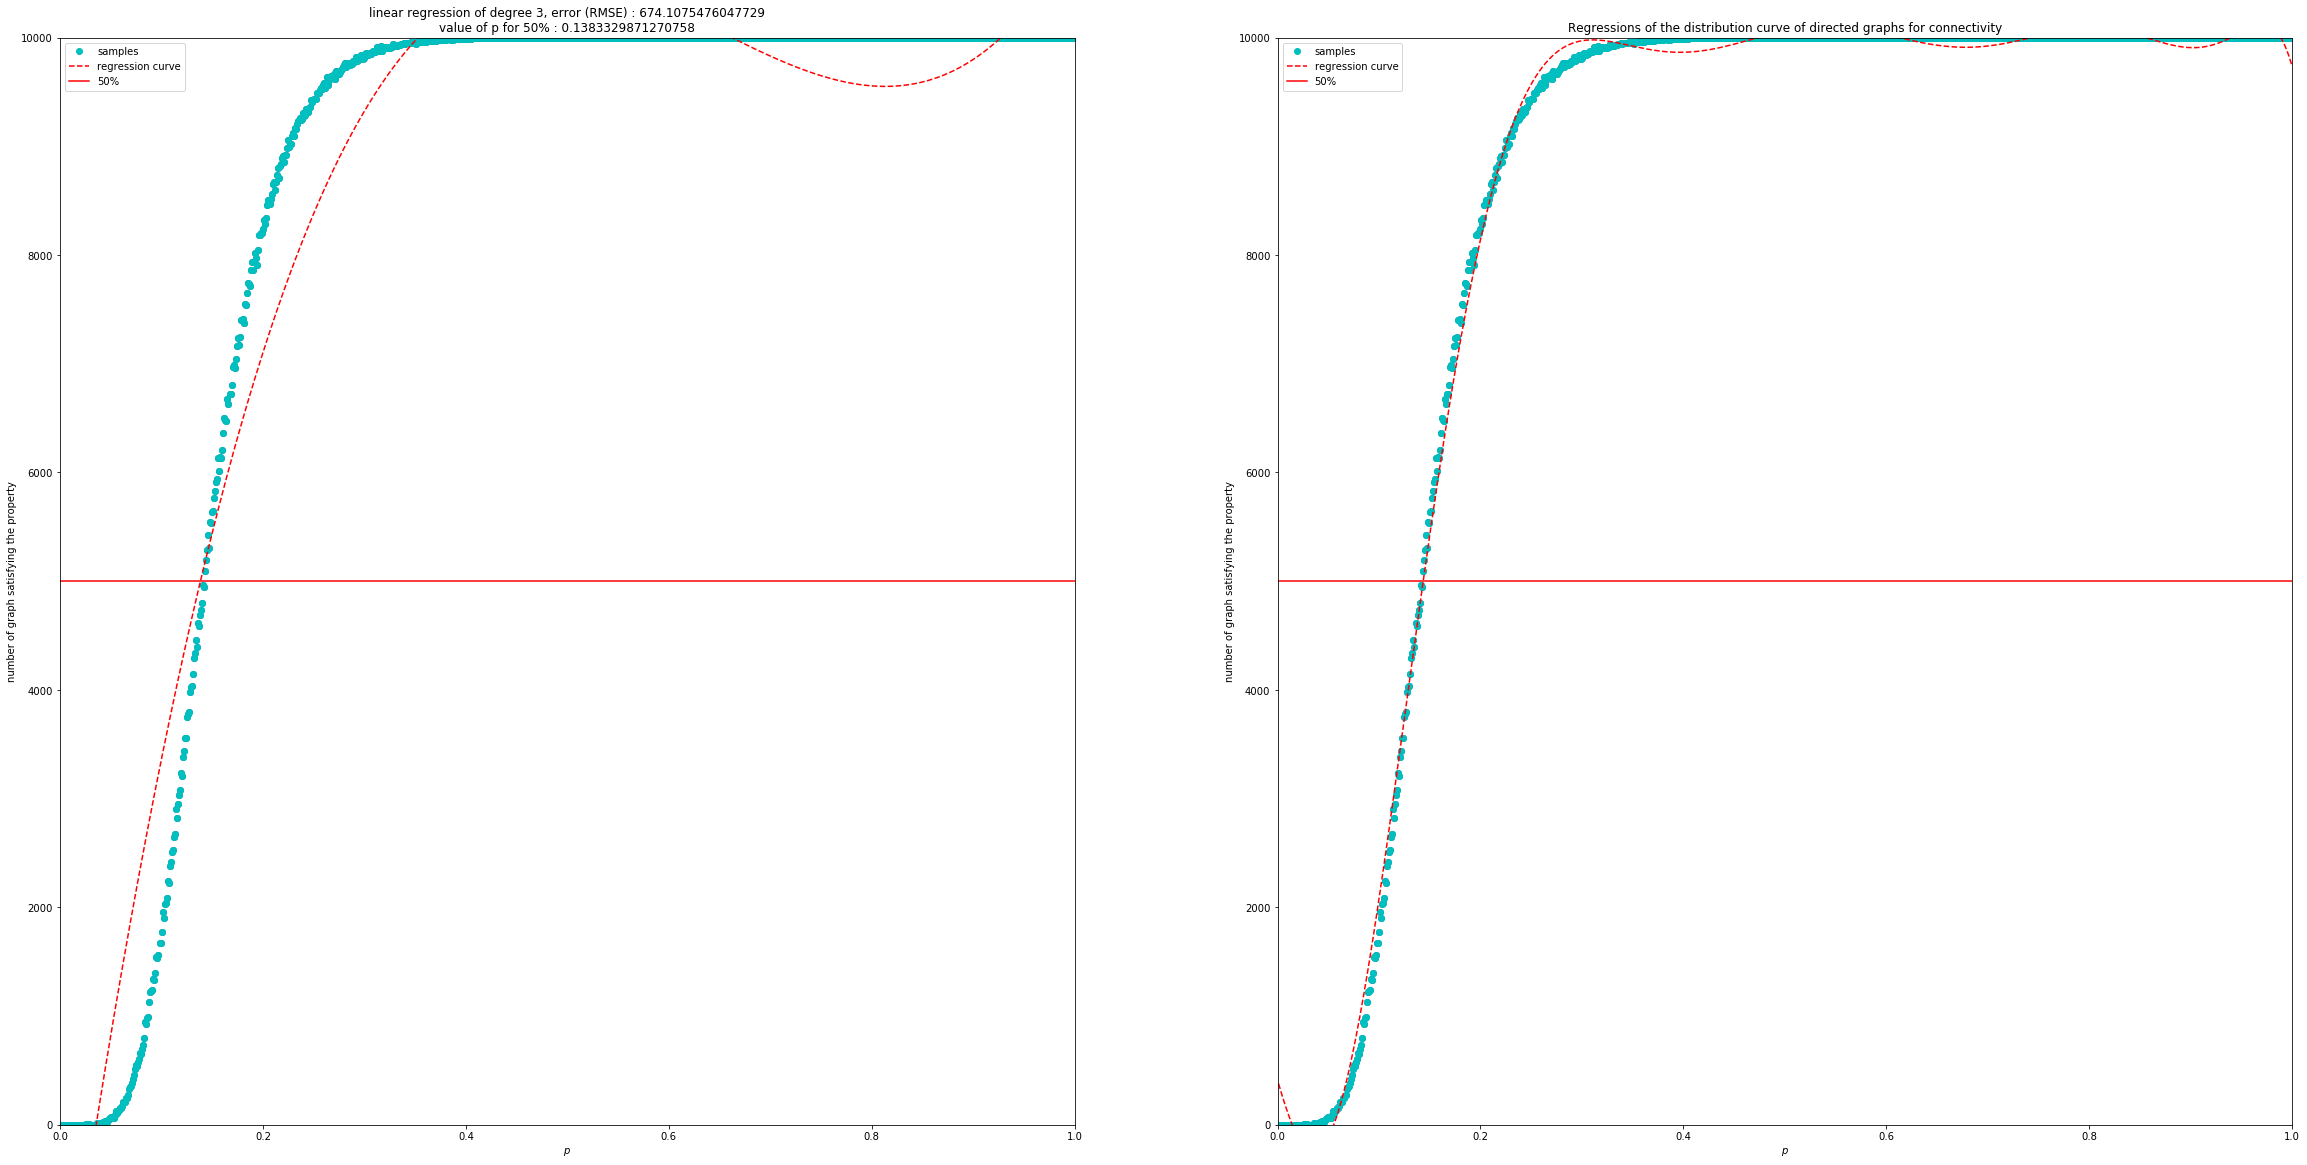

In [7]:
plot_regressions(df,'10',nb_samples,'Regressions of the distribution curve of directed graphs for connectivity',
                 min_degree=3,
                 max_degree=10,
                 step_degree=7,
                 subplot=(1,2),
                 savefile="./poly_interpolation_order_10_connected_directed.pdf"
                )

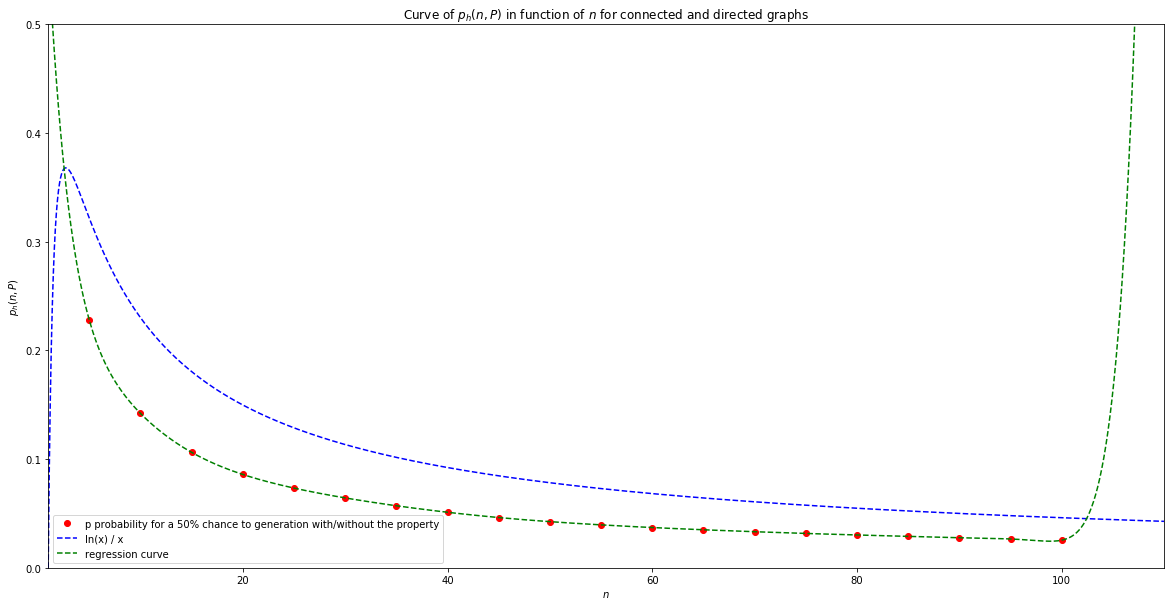

In [8]:
best_ps = compute_best_p(df,nb_samples,16)
x = np.array(list(map(lambda x : float(x[0]), list(best_ps.items()))))
y = np.array(list(map(lambda x : x[1][1][3],list(best_ps.items()))))

m = df.shape[0]
fit = np.polyfit(x,y,16)
fit_fn = np.poly1d(fit)
y_pred = fit_fn(x)
mse = np.sum((y_pred - y) ** 2)
rmse = np.sqrt(mse / m)

plt.figure(figsize=(20,10))
plt.xlim((1,110))
plt.ylim((0.0,0.5))

# plot regression points from sample
plt.plot(x,y,'ro')

# plot ln(x)/x
t = np.arange(1., 200., 0.1)
plt.plot(t,np.log(t) / t,'--b')

# plot regression curve
t = np.arange(1.,200.,0.1)
plt.plot(t,fit_fn(t),'--g')

plt.legend(['p probability for a 50% chance to generation with/without the property','ln(x) / x','regression curve'])
plt.title('Curve of $p_h(n,P)$ in function of $n$ for connected and directed graphs')
plt.ylabel('$p_h(n,P)$')
plt.xlabel('$n$')
plt.savefig("./phnp_connected_directed.pdf",bbox_inches = 'tight')
plt.show()

In [9]:
print(type(fit_fn.coefficients))
print(fit_fn.coefficients)

acc = "List("
for itr in range(len(fit_fn.coefficients) - 1) :
    acc = acc + str(fit_fn.coefficients[itr]) + ","
acc = acc + str(fit_fn.coefficients[len(fit_fn.coefficients) - 1])
acc = acc + ")"
print(acc)

acc = "poly = ["
for itr in range(len(fit_fn.coefficients) - 1) :
    acc = acc + '"' + str(fit_fn.coefficients[itr]) + '"' + ","
    if(itr % 4 == 3):
        acc = acc + "\n"
acc = acc + '"' + str(fit_fn.coefficients[len(fit_fn.coefficients) - 1]) + '"'
acc = acc + "]"
print(acc)

<class 'numpy.ndarray'>
[ 4.33520865e-27 -3.70170007e-24  1.44954659e-21 -3.45041750e-19
  5.57904156e-17 -6.48630651e-15  5.59855852e-13 -3.65216685e-11
  1.81579831e-09 -6.88744322e-08  1.98152163e-06 -4.26783283e-05
  6.73253690e-04 -7.52336898e-03  5.67247569e-02 -2.70295404e-01
  7.88414078e-01]
List(4.335208651992264e-27,-3.7017000743225804e-24,1.4495465877426121e-21,-3.4504175021086393e-19,5.579041557445542e-17,-6.4863065126334395e-15,5.598558520755753e-13,-3.652166849342683e-11,1.8157983081745944e-09,-6.887443216124638e-08,1.9815216270209456e-06,-4.2678328315123474e-05,0.0006732536899013569,-0.007523368978553242,0.05672475690749882,-0.27029540434240223,0.7884140784509119)
poly = ["4.335208651992264e-27","-3.7017000743225804e-24","1.4495465877426121e-21","-3.4504175021086393e-19",
"5.579041557445542e-17","-6.4863065126334395e-15","5.598558520755753e-13","-3.652166849342683e-11",
"1.8157983081745944e-09","-6.887443216124638e-08","1.9815216270209456e-06","-4.2678328315123474e-05",